In [2]:
from IPython.display import clear_output

!pip install openmeteo-requests
!pip install requests-cache retry-requests

clear_output()

In [3]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

In [7]:
# 관측소 데이터 불러오기

path = '/Users/kengohirano/Desktop/수업/정보분석/정보분석 데이터/'

df = pd.read_csv(path + 'station_list.csv')

In [9]:
df.head(3)

,지역명,측정소명,측정소 주소,운영기관,설치년도,latitude,longitude
0,서울,강남구,서울 강남구 학동로,서울특별시보건환경연구원,1978.0,37.521149,127.060129
1,서울,강동구,서울 강동구 구천면로,서울특별시보건환경연구원,1997.0,37.549147,127.151421
2,서울,강북구,서울 강북구 삼양로,서울특별시보건환경연구원,1997.0,37.638647,127.017083


In [13]:
def process(url , latitude , longitude , observatory):
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "hourly": ["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone", "dust", "uv_index", "uv_index_clear_sky", "ammonia"],
        "start_date": "2022-07-29",
        "end_date": "2024-05-01"
    }
    responses = openmeteo.weather_api(url, params=params)

    response = responses[0]
        
    # Process hourly data. The order of variables needs to be the same as requested.
    hourly = response.Hourly()
    hourly_pm10 = hourly.Variables(0).ValuesAsNumpy()
    hourly_pm2_5 = hourly.Variables(1).ValuesAsNumpy()
    hourly_carbon_monoxide = hourly.Variables(2).ValuesAsNumpy()
    hourly_nitrogen_dioxide = hourly.Variables(3).ValuesAsNumpy()
    hourly_sulphur_dioxide = hourly.Variables(4).ValuesAsNumpy()
    hourly_ozone = hourly.Variables(5).ValuesAsNumpy()
    hourly_dust = hourly.Variables(6).ValuesAsNumpy()
    hourly_uv_index = hourly.Variables(7).ValuesAsNumpy()
    hourly_uv_index_clear_sky = hourly.Variables(8).ValuesAsNumpy()
    hourly_ammonia = hourly.Variables(9).ValuesAsNumpy()

    hourly_data = {"date": pd.date_range(
        start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
        end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
        freq = pd.Timedelta(seconds = hourly.Interval()),
        inclusive = "left"
    )}
    hourly_data["pm10"] = hourly_pm10
    hourly_data["pm2_5"] = hourly_pm2_5
    hourly_data["carbon_monoxide"] = hourly_carbon_monoxide
    hourly_data["nitrogen_dioxide"] = hourly_nitrogen_dioxide
    hourly_data["sulphur_dioxide"] = hourly_sulphur_dioxide
    hourly_data["ozone"] = hourly_ozone
    hourly_data["dust"] = hourly_dust
    hourly_data["uv_index"] = hourly_uv_index
    hourly_data["uv_index_clear_sky"] = hourly_uv_index_clear_sky
    hourly_data["ammonia"] = hourly_ammonia

    hourly_dataframe = pd.DataFrame(data = hourly_data)

    hourly_dataframe['observatory'] = observatory

    return hourly_dataframe

In [16]:
url = 'https://air-quality-api.open-meteo.com/v1/air-quality'
data = []

for idx in range(df.shape[0]):
    d = process(url , df.loc[idx , 'latitude'] , df.loc[idx , 'longitude'] , df.loc[idx , '측정소 주소'])
    data.append(d)

OpenMeteoRequestsError: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}

In [10]:
url = 'https://air-quality-api.open-meteo.com/v1/air-quality'

params = {
	"latitude": 50.04999542236328,
	"longitude": 1.4499988555908203,
	"hourly": ["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone", "dust", "uv_index", "uv_index_clear_sky", "ammonia"],
	"start_date": "2022-07-29",
	"end_date": "2024-05-01"
}
responses = openmeteo.weather_api(url, params=params)

In [11]:
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

hourly = response.Hourly()
hourly_pm10 = hourly.Variables(0).ValuesAsNumpy()
hourly_pm2_5 = hourly.Variables(1).ValuesAsNumpy()
hourly_carbon_monoxide = hourly.Variables(2).ValuesAsNumpy()
hourly_nitrogen_dioxide = hourly.Variables(3).ValuesAsNumpy()
hourly_sulphur_dioxide = hourly.Variables(4).ValuesAsNumpy()
hourly_ozone = hourly.Variables(5).ValuesAsNumpy()
hourly_dust = hourly.Variables(6).ValuesAsNumpy()
hourly_uv_index = hourly.Variables(7).ValuesAsNumpy()
hourly_uv_index_clear_sky = hourly.Variables(8).ValuesAsNumpy()
hourly_ammonia = hourly.Variables(9).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["pm10"] = hourly_pm10
hourly_data["pm2_5"] = hourly_pm2_5
hourly_data["carbon_monoxide"] = hourly_carbon_monoxide
hourly_data["nitrogen_dioxide"] = hourly_nitrogen_dioxide
hourly_data["sulphur_dioxide"] = hourly_sulphur_dioxide
hourly_data["ozone"] = hourly_ozone
hourly_data["dust"] = hourly_dust
hourly_data["uv_index"] = hourly_uv_index
hourly_data["uv_index_clear_sky"] = hourly_uv_index_clear_sky
hourly_data["ammonia"] = hourly_ammonia

hourly_dataframe = pd.DataFrame(data = hourly_data)

Coordinates 50.04999542236328°N 1.4499988555908203°E
Elevation 53.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [6]:
hourly_dataframe.isna().sum() / hourly_dataframe.shape[0] * 100

date                   0.000000
pm10                   0.933126
pm2_5                  0.933126
carbon_monoxide        0.933126
nitrogen_dioxide       0.933126
sulphur_dioxide        0.933126
ozone                  0.933126
dust                   0.933126
uv_index               0.933126
uv_index_clear_sky     0.933126
ammonia               30.015552
dtype: float64

<Axes: >

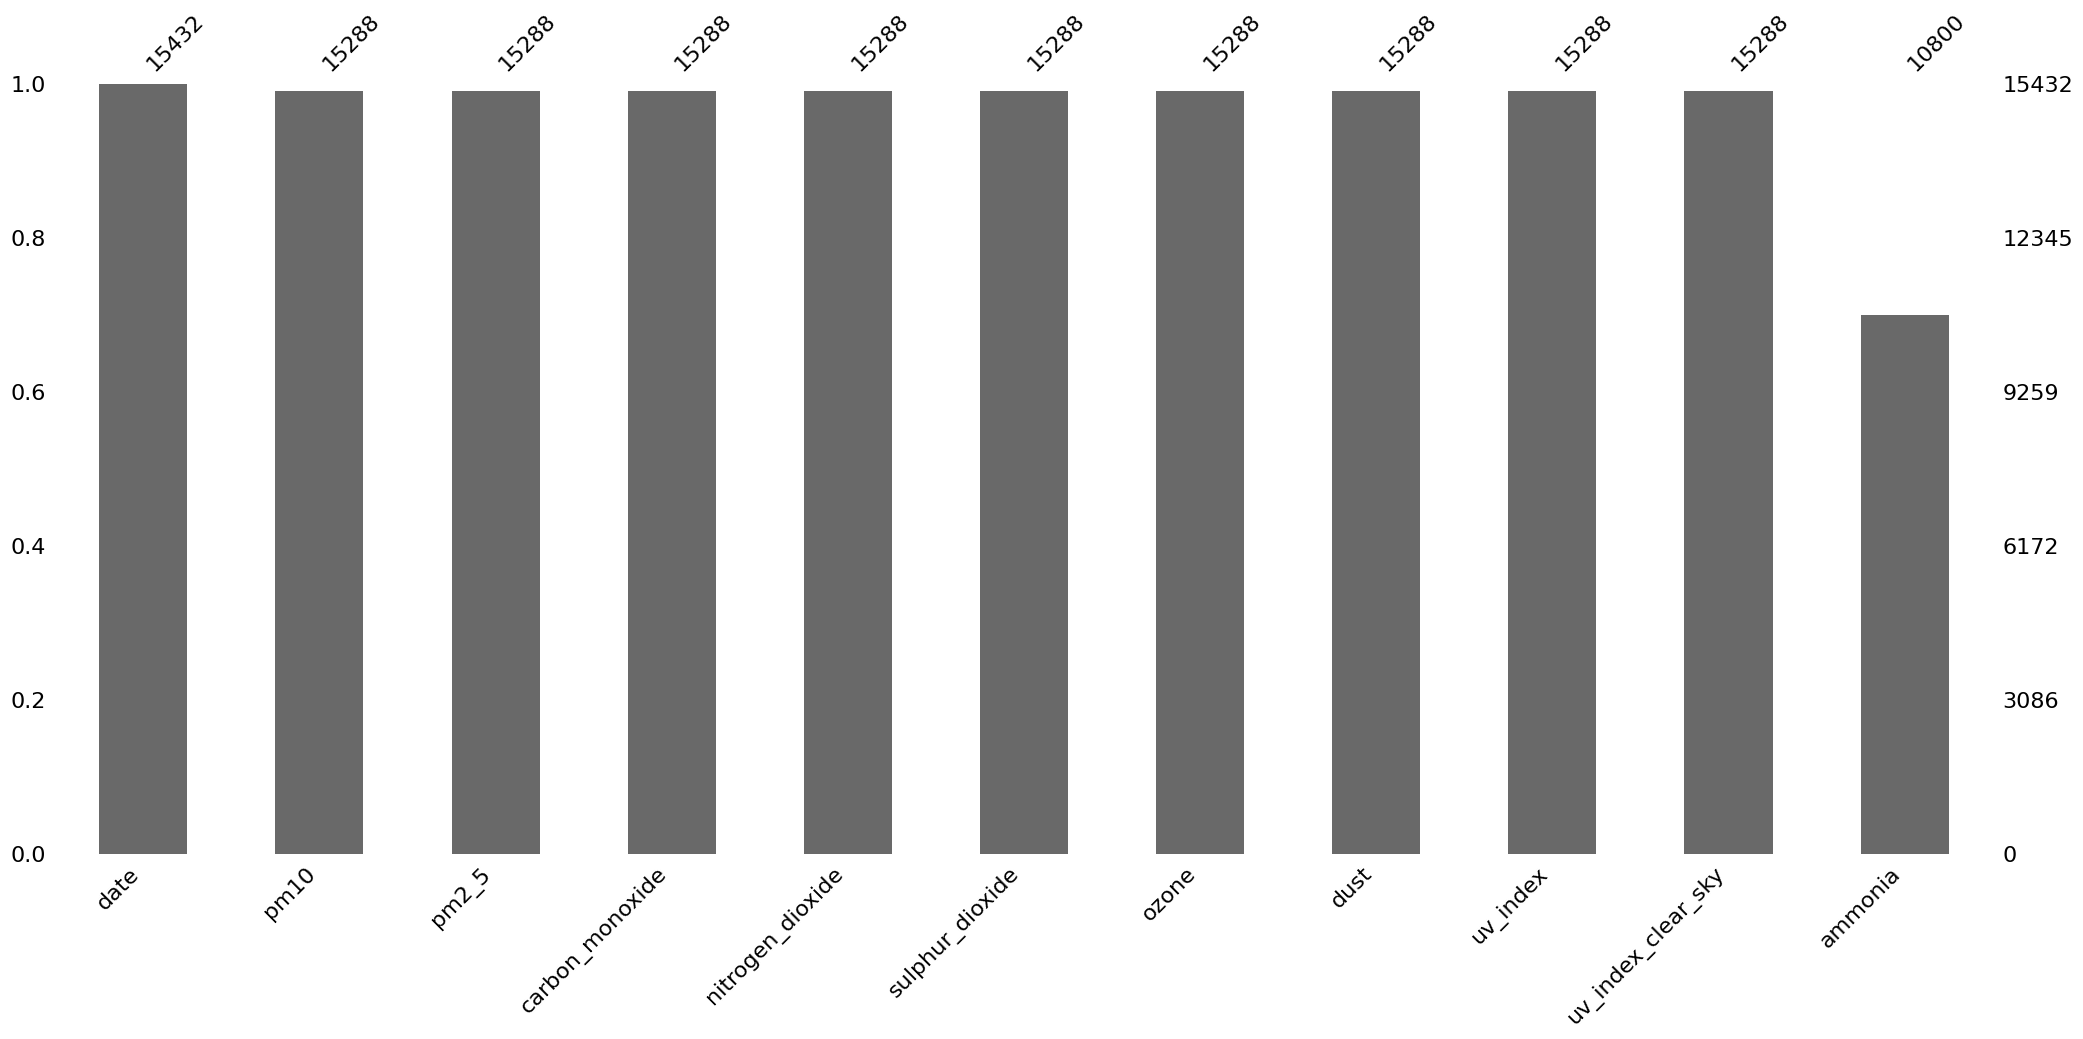

In [12]:
import missingno as msno

msno.bar(hourly_dataframe)

In [12]:
hourly_dataframe

,date,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,dust,uv_index,uv_index_clear_sky,ammonia
0,2022-07-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-07-29 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-29 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-07-29 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-07-29 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15427,2024-05-01 19:00:00+00:00,24.600000,17.0,168.0,24.299999,0.8,67.0,4.0,0.0,0.0,1.5
15428,2024-05-01 20:00:00+00:00,25.500000,17.5,172.0,19.299999,1.0,69.0,6.0,0.0,0.0,1.4
15429,2024-05-01 21:00:00+00:00,22.200001,15.0,167.0,11.000000,0.8,69.0,6.0,0.0,0.0,1.3
15430,2024-05-01 22:00:00+00:00,17.500000,13.2,162.0,8.600000,0.5,69.0,5.0,0.0,0.0,1.1


In [20]:
# 데이터 저장

# csv 데이터 프레임

hourly_dataframe.to_csv('./hourly_csv.csv')

# json 파일

hourly_dataframe.to_json('./hourly_json.json')

# xml 파일

hourly_dataframe.to_xml('./hourly_xml.xml')

In [2]:
import requests

url = 'https://api.openaq.org/v2/locations?parameters=pm25'
res = requests.get(url)
data = res.json()

In [12]:
import pandas as pd

pd.DataFrame(data['results']).isna().sum() / pd.DataFrame(data['results']).shape[0] * 100

id                 0.0
city              62.0
name               0.0
entity           100.0
country            0.0
sources          100.0
isMobile           0.0
isAnalysis       100.0
parameters         0.0
sensorType       100.0
coordinates        0.0
lastUpdated        0.0
firstUpdated       0.0
measurements       0.0
bounds             0.0
manufacturers      0.0
dtype: float64

In [18]:
pd.DataFrame(data['results']).loc[0 , 'parameters']

[{'id': 5,
  'unit': 'µg/m³',
  'count': 5254,
  'average': 2.8375000000000004,
  'parameter': 'no2',
  'lastValue': 2.5,
  'displayName': 'no2 µg/m³',
  'lastUpdated': '2024-05-21T22:00:00+00:00',
  'parameterId': 5,
  'firstUpdated': '2023-03-31T15:00:00+00:00',
  'manufacturers': None},
 {'id': 3,
  'unit': 'µg/m³',
  'count': 5395,
  'average': 90.34761904761905,
  'parameter': 'o3',
  'lastValue': 90.6,
  'displayName': 'o3 µg/m³',
  'lastUpdated': '2024-05-21T22:00:00+00:00',
  'parameterId': 3,
  'firstUpdated': '2023-03-31T15:00:00+00:00',
  'manufacturers': None},
 {'id': 2,
  'unit': 'µg/m³',
  'count': 5620,
  'average': 7.666666666666667,
  'parameter': 'pm25',
  'lastValue': 10.0,
  'displayName': 'pm25 µg/m³',
  'lastUpdated': '2024-05-21T22:00:00+00:00',
  'parameterId': 2,
  'firstUpdated': '2023-03-31T15:00:00+00:00',
  'manufacturers': None},
 {'id': 1,
  'unit': 'µg/m³',
  'count': 5620,
  'average': 10.19047619047619,
  'parameter': 'pm10',
  'lastValue': 14.0,
  'd